In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Part 1

VoteData = pd.read_csv('vote_subset.csv')

In [3]:
VoteData.head()

,RespID,ppl_like_you,President,Congress,Supreme_Court,CDC,Election_officials,Intelligence,Media,Police,USPS,age,education,race,gender,income_cat,voter_cat
0,470001,2.0,3.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0,73,College,White,Female,$75-125k,always
1,470002,2.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,90,College,White,Female,$125k or more,always
2,470003,1.0,3.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,53,College,White,Male,$125k or more,sporadic
3,470007,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,58,Some college,Black,Female,$40-75k,sporadic
4,480008,2.0,1.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,2.0,81,High school or less,White,Male,$40-75k,always


In [4]:
VoteDataSubset = VoteData[['ppl_like_you', 'CDC']]

In [5]:
VoteDataSubset.head() #A: Ordinal data, so use a bar graph

,ppl_like_you,CDC
0,2.0,1.0
1,2.0,2.0
2,1.0,1.0
3,3.0,2.0
4,2.0,3.0


In [6]:
VoteDataSubset = VoteDataSubset[(VoteDataSubset['ppl_like_you'] > 0) & (VoteDataSubset['CDC'] > 0)]

In [7]:
VoteDataSubset.describe()

,ppl_like_you,CDC
count,5769.000000,5769.000000
mean,2.879008,2.017334
std,0.801951,0.876993
min,1.000000,1.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,3.000000,2.000000
max,4.000000,4.000000


In [8]:
VoteDataSubset['ppl_like_you'].mask(VoteDataSubset['ppl_like_you'] == 1.0 ,'A lot', inplace=True)
VoteDataSubset['ppl_like_you'].mask(VoteDataSubset['ppl_like_you'] == 2.0 ,'Some', inplace=True)
VoteDataSubset['ppl_like_you'].mask(VoteDataSubset['ppl_like_you'] == 3.0 ,'Only a few', inplace=True)
VoteDataSubset['ppl_like_you'].mask(VoteDataSubset['ppl_like_you'] == 4.0 ,'None', inplace=True)

In [9]:
VoteDataSubset['CDC'].mask(VoteDataSubset['CDC'] == 1.0 ,'A lot', inplace=True)
VoteDataSubset['CDC'].mask(VoteDataSubset['CDC'] == 2.0 ,'Some', inplace=True)
VoteDataSubset['CDC'].mask(VoteDataSubset['CDC'] == 3.0 ,'Not much', inplace=True)
VoteDataSubset['CDC'].mask(VoteDataSubset['CDC'] == 4.0 ,'Not at all', inplace=True)

In [10]:
VoteDataSubset['ppl_like_you'].value_counts() #A: categorical data

Only a few    2659
Some          1562
None          1320
A lot          228
Name: ppl_like_you, dtype: int64

In [11]:
VoteDataSubset['CDC'].value_counts()

Some          2627
A lot         1737
Not much       973
Not at all     432
Name: CDC, dtype: int64

In [12]:
VoteDataSubset.head()

,ppl_like_you,CDC
0,Some,A lot
1,Some,Some
2,A lot,A lot
3,Only a few,Some
4,Some,Not much


In [23]:
raw_ppl_CDC_table = pd.crosstab(VoteDataSubset['ppl_like_you'], VoteDataSubset['CDC']).reindex(columns = 
                                                        ['A lot', 'Some', 'Not much', 'Not at all'],
                                                        index = ['None', 'Only a few', 'Some', 'A lot'])                                       
                                                        #index = ['A lot', 'Some', 'Only a few', 'None'])
raw_ppl_CDC_table

CDC,A lot,Some,Not much,Not at all
ppl_like_you,,,,
None,332,612,223,153
Only a few,763,1241,476,179
Some,533,705,247,77
A lot,109,69,27,23


In [24]:
ppl_CDC_table = pd.crosstab(VoteDataSubset['ppl_like_you'], VoteDataSubset['CDC'], normalize = 'index').reindex(columns = 
                                                        ['A lot', 'Some', 'Not much', 'Not at all'],
                                                        index = ['None', 'Only a few', 'Some', 'A lot'])                                                        
                                                        #index = ['A lot', 'Some', 'Only a few', 'None'])
ppl_CDC_table #B: Data are in proportions

CDC,A lot,Some,Not much,Not at all
ppl_like_you,,,,
None,0.251515,0.463636,0.168939,0.115909
Only a few,0.286950,0.466717,0.179015,0.067319
Some,0.341229,0.451344,0.158131,0.049296
A lot,0.478070,0.302632,0.118421,0.100877


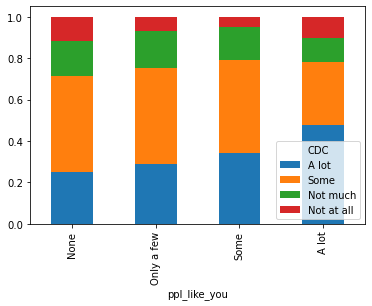

In [25]:
ppl_CDC_table.plot.bar(stacked = True)
plt.show()

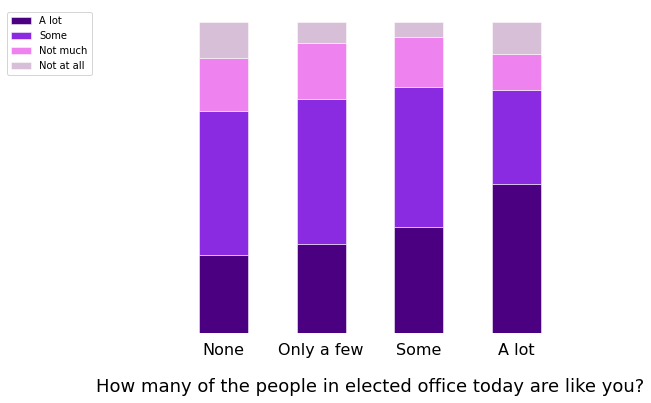

In [26]:
ax = ppl_CDC_table.plot.bar(stacked = True, color = ['indigo', 'blueviolet', 'violet', 'thistle'], rot = 0, figsize = [7,6],
              fontsize = 16, edgecolor = 'white', linewidth = 0.5)
plt.xlabel('How many of the people in elected office today are like you?', fontsize = 18, labelpad = 20)
[ax.spines[i].set_visible(False) for i in ax.spines]
ax.tick_params(length = 0, pad = 10)
ax.get_yaxis().set_visible(False) 
plt.legend(bbox_to_anchor = [-0.2,1])

plt.show()

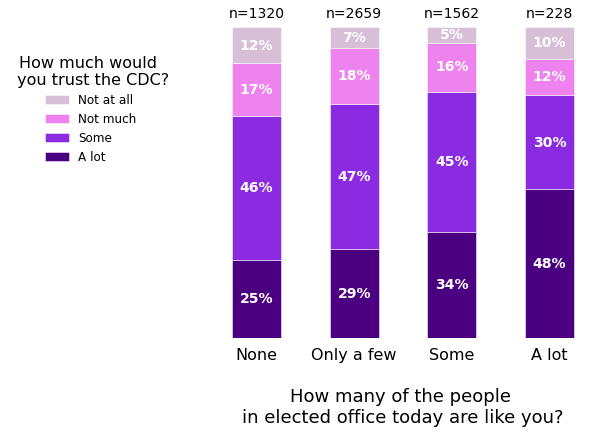

In [27]:
ax = ppl_CDC_table.plot.bar(stacked = True, color = ['indigo', 'blueviolet', 'violet', 'thistle'], rot = 0, figsize = [7,6],
              fontsize = 16, edgecolor = 'white', linewidth = 0.5)
plt.xlabel('How many of the people \nin elected office today are like you?', fontsize = 18, labelpad = 25)
[ax.spines[i].set_visible(False) for i in ax.spines]
ax.tick_params(length = 0, pad = 10)
ax.get_yaxis().set_visible(False) 
plt.legend(bbox_to_anchor = [-0.2,1])

for patch in ax.patches:
    x,y,width,height = patch.get_x(), patch.get_y(), patch.get_width(), patch.get_height()
    center_x = x + width/2
    center_y = y + height/2
    label = f'{height*100:.0f}%'
    plt.text(center_x,center_y,label,ha = 'center', va = 'center', color = 'white', weight = 'bold', fontsize = 14)

for i in range(raw_ppl_CDC_table.shape[0]):
    label = 'n=' + str(raw_ppl_CDC_table.iloc[i].sum())
    plt.text(i, 1.03, label, ha = 'center', fontsize = 14)  
    
handles,labels = ax.get_legend_handles_labels()   
handles = handles[::-1]
labels = labels[::-1]
legend = plt.legend(handles, labels, bbox_to_anchor = [-0.3,0.7], loc = 'center',
                 title = 'How much would \n you trust the CDC?', title_fontsize = 16, 
                 fontsize = 12, frameon = False) 
legend.get_title().set_multialignment('center')

plt.savefig('stacked_bar.png', bbox_inches = 'tight')

plt.show()

In [28]:
#Part 2

VotingData = pd.read_csv('Vote_subset.csv')

In [29]:
VotingData.head()

,RespID,ppl_like_you,President,Congress,Supreme_Court,CDC,Election_officials,Intelligence,Media,Police,USPS,age,education,race,gender,income_cat,voter_cat
0,470001,2.0,3.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0,73,College,White,Female,$75-125k,always
1,470002,2.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,90,College,White,Female,$125k or more,always
2,470003,1.0,3.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,53,College,White,Male,$125k or more,sporadic
3,470007,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,58,Some college,Black,Female,$40-75k,sporadic
4,480008,2.0,1.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,2.0,81,High school or less,White,Male,$40-75k,always


In [30]:
VotingDataSub = VotingData[['age', 'voter_cat']]
VotingDataSub.head()

,age,voter_cat
0,73,always
1,90,always
2,53,sporadic
3,58,sporadic
4,81,always


In [31]:
VotingDataSub.describe()

,age
count,5836.000000
mean,51.693797
std,17.071561
min,22.000000
25%,36.000000
50%,54.000000
75%,65.000000
max,94.000000


In [32]:
VotingDataSub['voter_cat'].unique()

array(['always', 'sporadic', 'rarely/never'], dtype=object)

In [33]:
VotingDataSub['age'].unique()

array([73, 90, 53, 58, 81, 61, 80, 68, 70, 83, 43, 42, 48, 52, 76, 63, 46,
       62, 84, 71, 50, 77, 67, 54, 47, 87, 55, 64, 82, 66, 75, 59, 44, 36,
       56, 57, 29, 38, 26, 27, 28, 49, 72, 39, 40, 74, 65, 89, 69, 79, 30,
       41, 78, 60, 25, 22, 88, 31, 35, 85, 32, 51, 45, 86, 37, 92, 33, 24,
       34, 23, 94, 91], dtype=int64)

In [34]:
AlwaysVoter = VotingDataSub[VotingDataSub['voter_cat'] == 'always']
AlwaysVoter.head()

,age,voter_cat
0,73,always
1,90,always
4,81,always
6,80,always
7,68,always


In [35]:
AlwaysVoterAge = AlwaysVoter['age']
AlwaysVoterAge

0       73
1       90
4       81
6       80
7       68
        ..
5810    23
5819    70
5831    27
5834    22
5835    22
Name: age, Length: 1811, dtype: int64

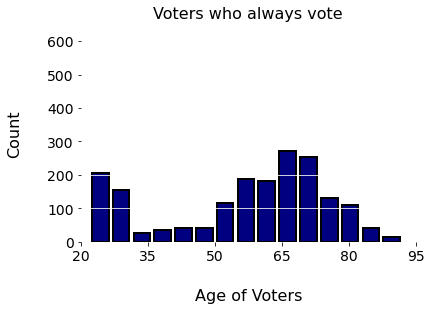

In [41]:
LABEL_SIZE = 16
TICK_SIZE = 14 
n_bins = 15

plt.hist(AlwaysVoterAge, color = 'navy', ec = 'black', lw = 2, rwidth = 0.8, bins = n_bins)
ax = plt.gca()
plt.tick_params(labelsize = TICK_SIZE)
plt.grid(axis = 'y', color = 'white')
plt.xlabel('Age of Voters', fontsize = LABEL_SIZE, labelpad = 25)
plt.ylabel('Count', fontsize = LABEL_SIZE, labelpad = 25)
[ax.spines[i].set_visible(False) for i in ax.spines]
plt.title('Voters who always vote', fontsize = LABEL_SIZE)
plt.xlim(20, 95)
plt.ylim(0, 650)
plt.xticks([20, 35, 50, 65, 80, 95])

plt.show()

In [38]:
SporadicVoter = VotingDataSub[VotingDataSub['voter_cat'] == 'sporadic']
SporadicVoter.head()

,age,voter_cat
2,53,sporadic
3,58,sporadic
10,43,sporadic
11,42,sporadic
13,52,sporadic


In [42]:
SporadicVoterAge = SporadicVoter['age']
SporadicVoterAge

2       53
3       58
10      43
11      42
13      52
        ..
5824    59
5826    47
5827    45
5828    37
5833    51
Name: age, Length: 2574, dtype: int64

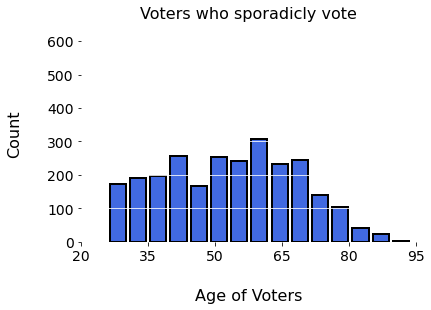

In [43]:
LABEL_SIZE = 16
TICK_SIZE = 14 
n_bins = 15

plt.hist(SporadicVoterAge, color = 'royalblue', ec = 'black', lw = 2, rwidth = 0.8, bins = n_bins)
ax = plt.gca()
plt.tick_params(labelsize = TICK_SIZE)
plt.grid(axis = 'y', color = 'white')
plt.xlabel('Age of Voters', fontsize = LABEL_SIZE, labelpad = 25)
plt.ylabel('Count', fontsize = LABEL_SIZE, labelpad = 25)
[ax.spines[i].set_visible(False) for i in ax.spines]
plt.title('Voters who sporadicly vote', fontsize = LABEL_SIZE)
plt.xlim(20, 95)
plt.ylim(0, 650)
plt.xticks([20, 35, 50, 65, 80, 95])

plt.show()

In [44]:
RarelyNeverVoter = VotingDataSub[VotingDataSub['voter_cat'] == 'rarely/never']
RarelyNeverVoter.head()

,age,voter_cat
5,61,rarely/never
12,48,rarely/never
20,46,rarely/never
26,50,rarely/never
32,47,rarely/never


In [45]:
RarelyNeverVoterAge = VotingDataSub['age']
RarelyNeverVoterAge

0       73
1       90
2       53
3       58
4       81
        ..
5831    27
5832    59
5833    51
5834    22
5835    22
Name: age, Length: 5836, dtype: int64

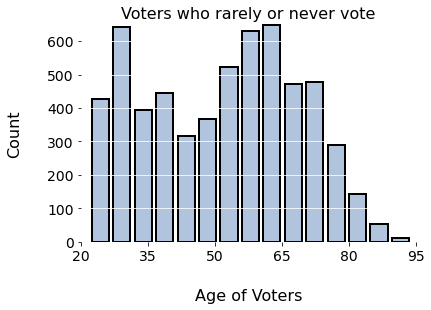

In [46]:
LABEL_SIZE = 16
TICK_SIZE = 14 
n_bins = 15

plt.hist(RarelyNeverVoterAge, color = 'lightsteelblue', ec = 'black', lw = 2, rwidth = 0.8, bins = n_bins)
ax = plt.gca()
plt.tick_params(labelsize = TICK_SIZE)
plt.grid(axis = 'y', color = 'white')
plt.xlabel('Age of Voters', fontsize = LABEL_SIZE, labelpad = 25)
plt.ylabel('Count', fontsize = LABEL_SIZE, labelpad = 25)
[ax.spines[i].set_visible(False) for i in ax.spines]
plt.title('Voters who rarely or never vote', fontsize = LABEL_SIZE)
plt.xlim(20, 95)
plt.ylim(0,650)
plt.xticks([20, 35, 50, 65, 80, 95])

plt.show()

In [47]:
print(AlwaysVoterAge.min(),'-', AlwaysVoterAge.max())
print(SporadicVoterAge.min(), '-', SporadicVoterAge.max())
print(RarelyNeverVoterAge.min(), '-', RarelyNeverVoterAge.max())

22 - 92
26 - 94
22 - 94


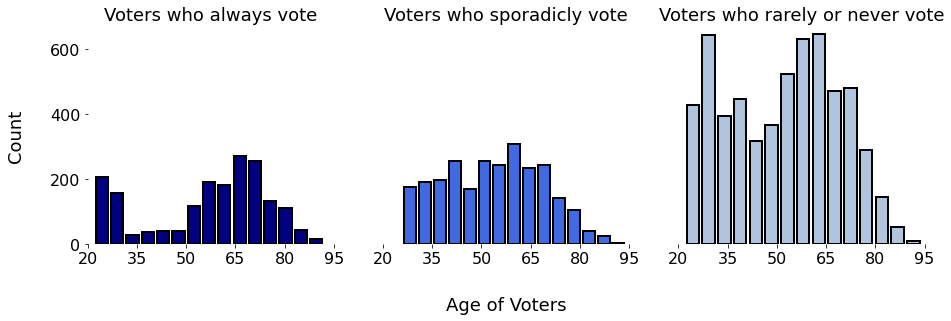

In [48]:
#Array of subplots that represnt the 3 categories of voters
f,[ax_hist_always, ax_hist_sporadic, ax_hist_rare] = plt.subplots(1, 3, figsize = (15, 4))

LABEL_SIZE = 18
TICK_SIZE = 16
n_bins = 15

#The making of the always voters histogram
ax_hist_always.hist(AlwaysVoterAge, color = 'navy', ec = 'black', lw = 2, rwidth = 0.8, bins = n_bins)
ax_hist_always.tick_params(labelsize = TICK_SIZE)
#ax_hist_always.grid(axis = 'y', color = 'white')
ax_hist_always.set_ylabel('Count', fontsize = LABEL_SIZE, labelpad = 25)
[ax_hist_always.spines[i].set_visible(False) for i in ax.spines]
ax_hist_always.set_title('Voters who always vote', fontsize = LABEL_SIZE)
ax_hist_always.set_xlim(20, 95)
ax_hist_always.set_ylim(0, 670)
ax_hist_always.set_xticks([20, 35, 50, 65, 80, 95])

#The making of the sporadic voters histogram
ax_hist_sporadic.hist(SporadicVoterAge, color = 'royalblue', ec = 'black', lw = 2, rwidth = 0.8, bins = n_bins)
ax_hist_sporadic.tick_params(labelsize = TICK_SIZE)
#ax_hist_sporadic.grid(axis = 'y', color = 'white')
[ax_hist_sporadic.spines[i].set_visible(False) for i in ax.spines]
ax_hist_sporadic.set_xlabel('Age of Voters', fontsize = LABEL_SIZE, labelpad = 30)
ax_hist_sporadic.set_title('Voters who sporadicly vote', fontsize = LABEL_SIZE)
ax_hist_sporadic.set_xlim(20, 95)
ax_hist_sporadic.set_ylim(0, 670)
ax_hist_sporadic.set_yticklabels([])
ax_hist_sporadic.set_xticks([20, 35, 50, 65, 80, 95])

for tic in ax_hist_sporadic.yaxis.get_major_ticks():
    tic.tick1line.set_visible(False)

#The making of the rarely/never voters histogram    
ax_hist_rare.hist(RarelyNeverVoterAge, color = 'lightsteelblue', ec = 'black', lw = 2, rwidth = 0.8, bins = n_bins)
ax_hist_rare.tick_params(labelsize = TICK_SIZE)
#ax_hist_rare.grid(axis = 'y', color = 'white')
[ax_hist_rare.spines[i].set_visible(False) for i in ax.spines]
ax_hist_rare.set_title('Voters who rarely or never vote', fontsize = LABEL_SIZE)
ax_hist_rare.set_xlim(20, 95)
ax_hist_rare.set_ylim(0, 670)
ax_hist_rare.set_yticklabels([])
ax_hist_rare.set_xticks([20, 35, 50, 65, 80, 95])

for tic in ax_hist_rare.yaxis.get_major_ticks():
    tic.tick1line.set_visible(False)

plt.show()

f.savefig('histograms.png', bbox_inches = 'tight')